In [2]:
from __future__ import division, print_function

import os, glob
import numpy as np
import matplotlib.pyplot as plt
from rvseg import patient

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
basedir = "/home/sajal/Desktop/rvsc/TrainingSet"
datadir = os.path.join(basedir, "patient09")
p = patient.PatientData(datadir)

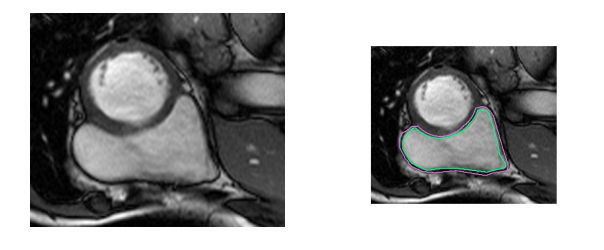

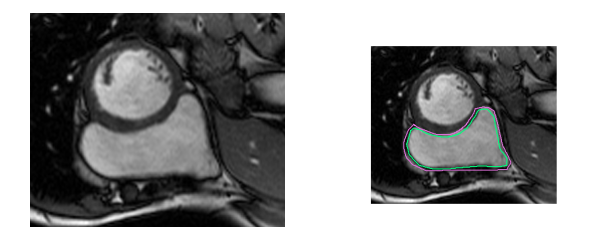

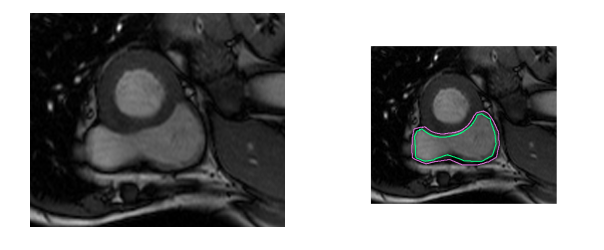

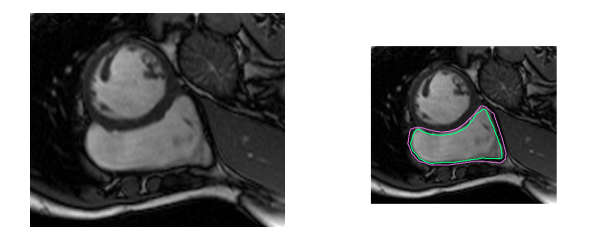

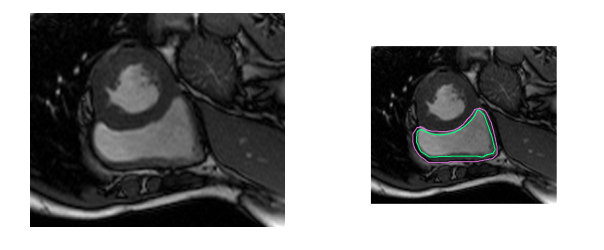

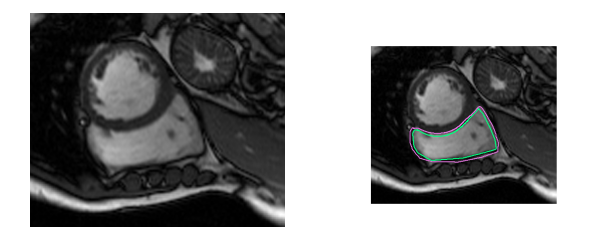

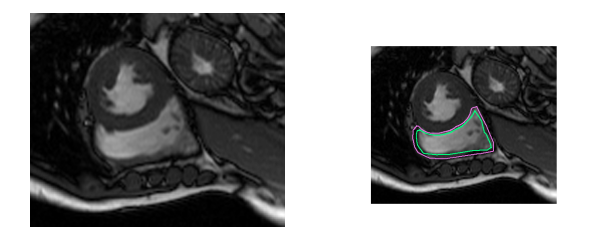

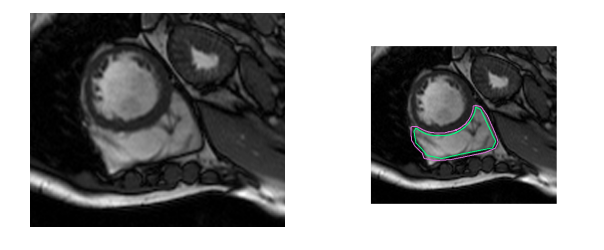

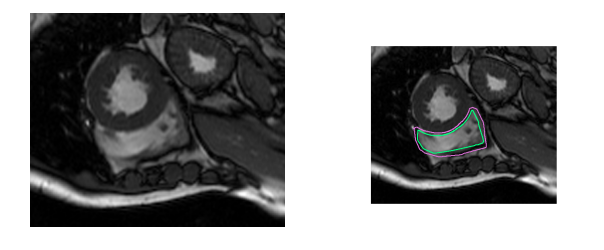

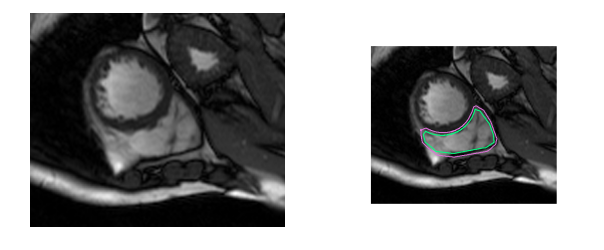

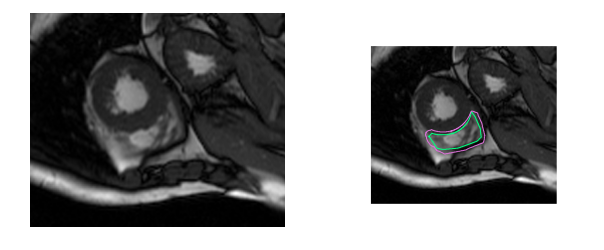

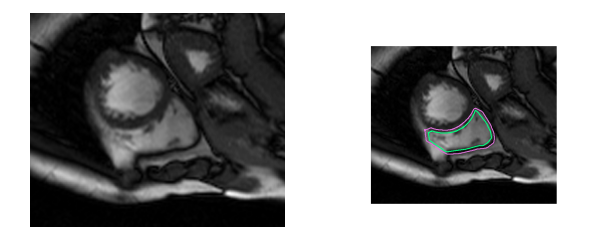

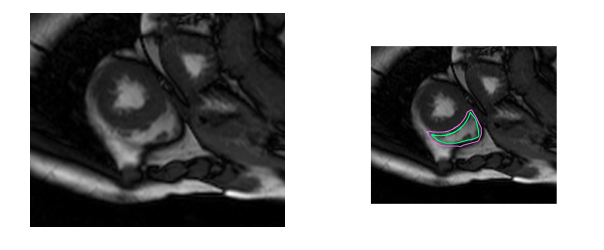

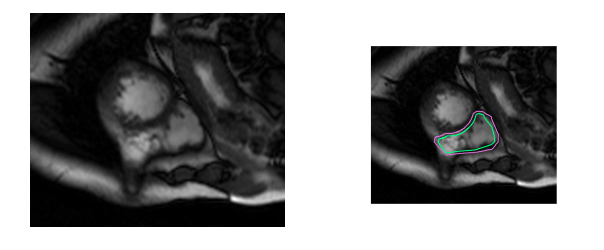

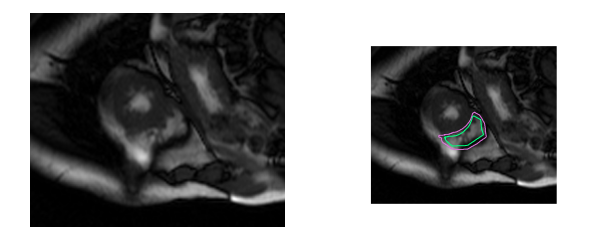

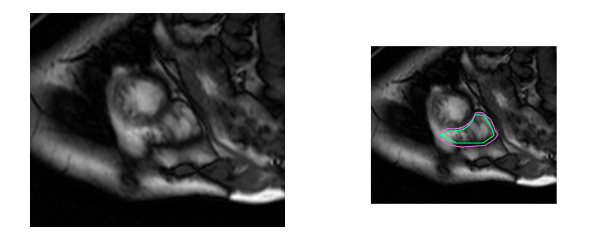

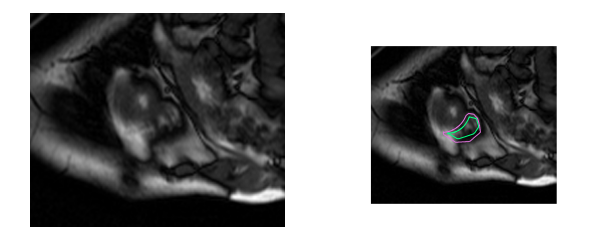

In [4]:
for index in range(len(p.images)):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(p.images[index], cmap=plt.cm.gray)
    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(p.images[index], cmap=plt.cm.gray)
    plt.plot(*p.endocardium_contours[index], color='springgreen')
    plt.plot(*p.epicardium_contours[index], color='orchid')

## Spline curves to estimate uncertainty

In [ ]:
from scipy import interpolate

467 0.967144522944
448 0.959858156028
458 0.962323221419
434 0.955210402745
472 0.973527307417
457 0.970275309861
452 0.969300160047
440 0.940730079812
452 0.947448882094
425 0.951979234263
439 0.958416977344
413 0.971760154739
463 0.964255319149
440 0.957437472576
404 0.952908587258
396 0.959245742092
398 0.954940711462
0.959809543603 0.00870759062761


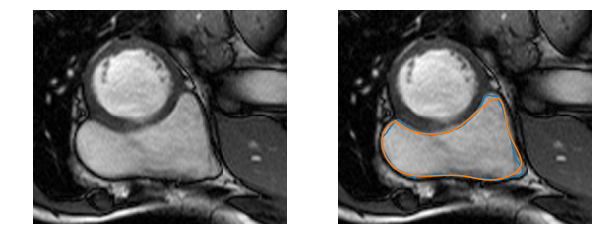

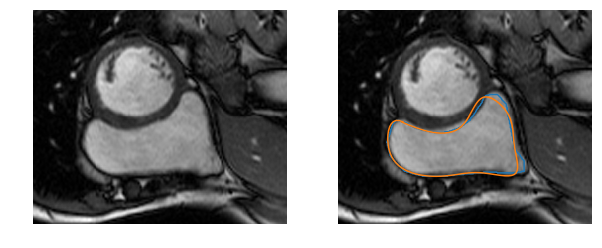

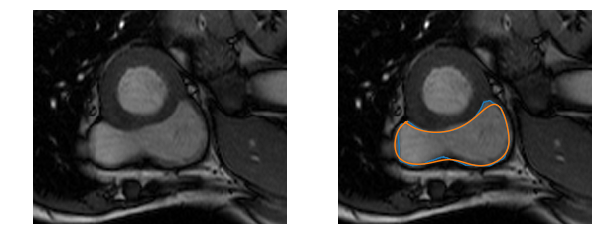

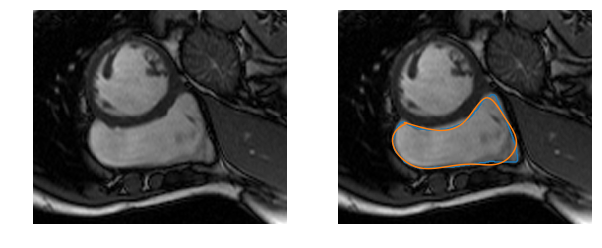

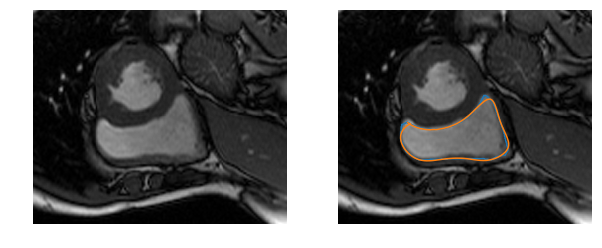

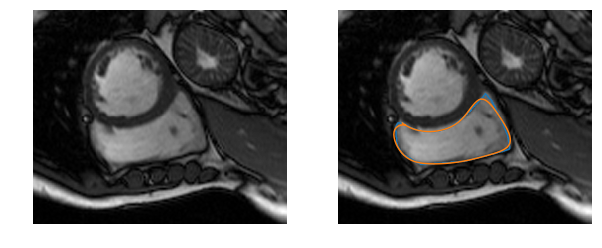

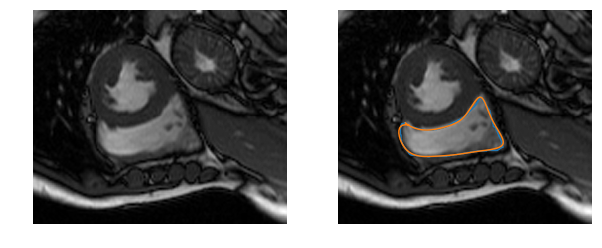

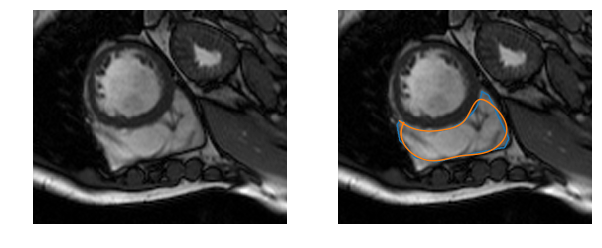

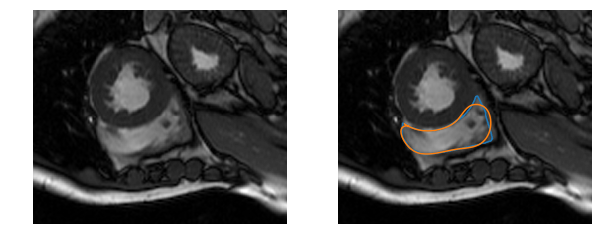

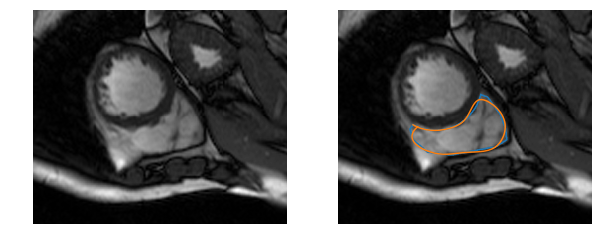

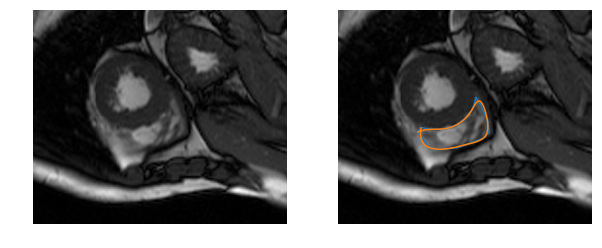

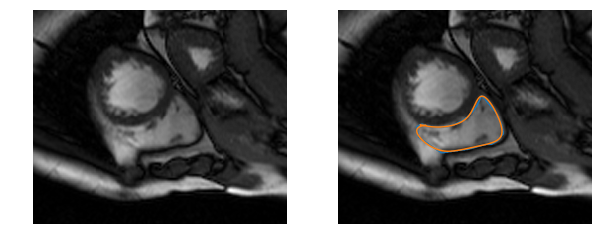

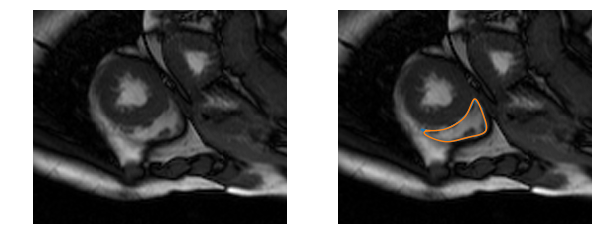

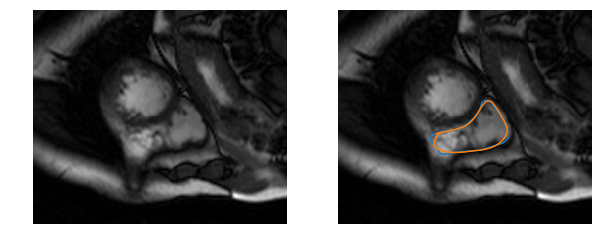

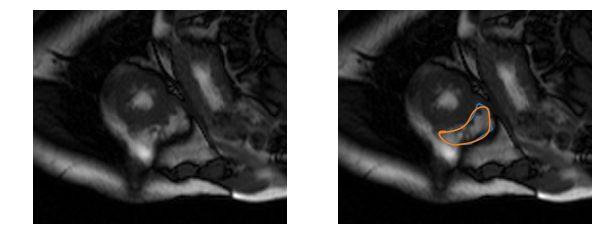

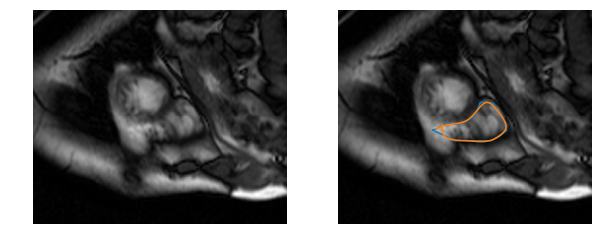

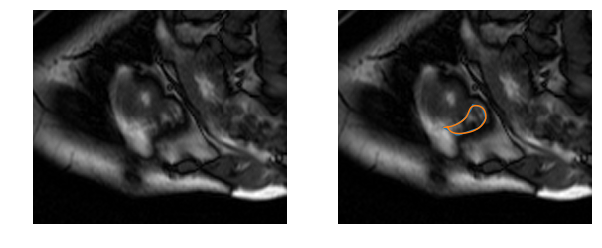

In [31]:
dices = []

stride = 40
for n in range(len(p.images)):
    image = p.images[n]
    x, y = p.endocardium_contours[n]
    x1 = np.concatenate((x[::stride], [x[n]]))
    y1 = np.concatenate((y[::stride], [y[n]]))
    tck, u = interpolate.splprep((x1, y1), s=0)
    unew = np.arange(0, 1.01, 0.01)
    x2, y2 = interpolate.splev(unew, tck)
    mask1 = p.endocardium_masks[n]
    mask2 = p.contour_to_mask(x2, y2, norm=1)
    dice = 2 * np.sum(mask1 * mask2) / (np.sum(mask1) + np.sum(mask2))
    dices.append(dice)
    print(len(x), dice)
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray)
    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray)
    plt.plot(x, y)
    plt.plot(x2, y2)
print(np.mean(dices), np.std(dices))


## Boxplots

In [6]:
base = "/home/paperspace/Developer/work/rvsc/"

paths = [
    base + "aaug/1e-3/unet-aaug",
    base + "mnt/dilated-unet/aaug/1e-3/dilated-unet-aaug",
    base + "dilated-densenet/aaug/8-layer-24-features/dilated-densenet-8-24-aaug"
]

paths = [
    base + "eaug/1e-3/unet-eaug",
    base + "mnt/dilated-unet/eaug/1e-3/dilated-unet-eaug",
    base + "dilated-densenet/eaug/8-layer-24-features/dilated-densenet-8-layer-24-features"
]


DICE, JACCARD = 0, 1
train = []
val = []
for path in paths:
    train.append(np.loadtxt(path + ".train").T[DICE])
    val.append(np.loadtxt(path + ".val").T[DICE])

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.boxplot(train)
plt.ylim(-0.03, 1.03)
plt.ylabel("training dice coefficient")
plt.xticks([1, 2, 3], ["u-net", "dilated u-net", "dilated densenet"])
plt.subplot(1, 2, 2)
plt.boxplot(val)
plt.ylim(-0.03, 1.03)
plt.ylabel("validation dice coefficient")
plt.xticks([1, 2, 3], ["u-net", "dilated u-net", "dilated densenet"])

FileNotFoundError: [Errno 2] No such file or directory: '/home/paperspace/Developer/work/rvsc/eaug/1e-3/unet-eaug.train'